이 튜토리얼은 커널 부문 세계1위인 안드레이 룩야넨코의 노트북에 한글로 설명을 추가로 붙인것입니다.  
Table of contents  
Part 1: 데이터 준비 및 모듈 임포트  
Part 2: 파일 병합  
Part 3: 파일 탐색  
Part 4: 데이터 탐구 (Exploratory Data Analysis)   
Part 5: Feature Engineering  
   
Part 6: 마지막 항목 결정  
Part 7: 머신러닝 모델 만들기  
Part 8: 중요도에 따라 모델 재 설정  
Part 9: 하이퍼 파라미터 튜닝  
Part 10: 모델 재 트레이닝  
  
Part 11: 마지막 보팅  
Part 12: 마지막 모델 예측  
Part 13: 제출  

# Part 1: 데이터 준비 및 모듈 임포트

In [1]:
# 기본 데이터 정리 및 처리
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# 전처리 및 머신러닝 알고리즘
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

# 경고 제거(판다스가 에러 메세지를 자주 만들어 내기 때문에 이를 일단 무시하도록 설정합니다.)
import sys
import warnings
warnings.filterwarnings('ignore')

## CSV to DF
- csv를 임포트 하여 데이터 셋이 판다스 데이터 프레임이 되도록 합니다.

In [2]:
test = pd.read_csv(r'D:\Python\titanic_test.csv')
train= pd.read_csv(r'D:\Python\titanic_train.csv')

train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


`describe( )`는 각 열의 통계적인 면을 보여줍니다.  
기본은 연속된 값을 가진 열만 보여주나 " include='all' "로 세팅하면 모두 볼 수 있습니다.

In [4]:
train.describe( include='all' )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hoyt, Mr. William Fisher",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


`dtypes`는 모든 열의 데이터 종류를 보여 줍니다.

In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

`info( )`는 `dtypes`의 좀 더 발전된 개념으로 데이터 타입뿐만 아니라 빈칸이 아닌 갯수까지 보여줍니다.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Part 2: 파일 병합
- ntrain과 ntest의 shape을 확보해놓습니다. (병합한 것을 나중에 다시 갈라 놓기 위한 준비)
- y_train은 알려진 결과 값이니 따로 모셔 놓고
- 테스트의 승객 아이디는 나중에 최종 결과에 넣을 것이기 때문에 따로 떼어 놓습니다.
- train과 test를 병합하여 data란 파일을 만듭니다. 문자로 된 것을 숫자로 바꾼다든가. 숫자를 인터발 별로 그룹화한다든가 할 때 한꺼번에 하기 위해 합해 놓습니다.

In [7]:
# 병합준비
ntrain = train.shape[0]
ntest = test.shape[0]

# 아래는 따로 잘 모셔둡니다.
y_train = train['Survived'].values
passId = test['PassengerId']

# 병합 파일 만들기
data = pd.concat([train, test])

# 데이터 행과 열의 크기는
print('data size is: {}'.format(data.shape))

data size is: (1309, 12)


0    549
1    342
Name: Survived, dtype: int64


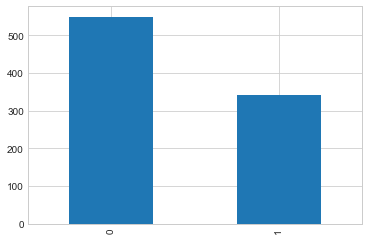

In [8]:
print(train['Survived'].value_counts())
train['Survived'].value_counts().plot(kind='bar');

train 데이터에 있는 인원 중 342명이 살아남고 549명이 사망했다는 것을 볼 수 있습니다.

# Part 3: 파일 탐색

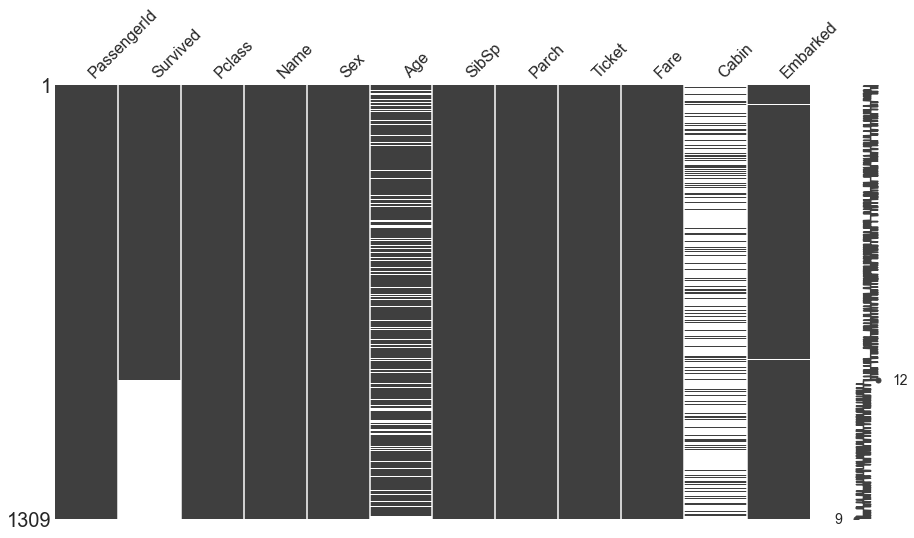

In [9]:
missingno.matrix(data, figsize=(15, 8));

위 도표는 빈 값을 직관적으로 볼 수 있게 합니다. 아래 쪽 `Survived`가 비어 있는데 이 것은 테스트에 우리가 답으로 예측해야 하는 부분이라 그렇습니다.

In [10]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [11]:
data.Age.isnull().any()

True

열 이름을 보겠습니다.

In [12]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Features 항목**  

항목의 종류
- 범주형 항목(Categorical Features)  
범주형 항목은 범주형 변수로 된 항목으로 범주형 변수는 둘 이상의 결과 요소가 있는 변수이며 해당 기능의 각 값을 범주별로 분류할 수 있습니다.  
예를 들어 성별은 두가지 범주 (남성과 여성)의 범주형 변수입니다.  

<br>

- 이산형 변수(discrete variable)  
범주형 변수(categorical variable)의 하나로 명목 변수 norminal variable라고도 합니다.  
데이터 셋에서 명목항목: Sex, Embark이며 우리는 Name, Ticket 등을 이로 변환해야 할 것 같습니다.

<br>

- 순서형 항목(Oridinal Variable)  
순위 변수는 범주형의 하나지만 그 차이점은 값 사이의 상대 순서(=서열) 또는 정렬이 가능하다는 것입니다.  
데이터 셋에서 순위항목: PClass이며 우리는 Cabin을 이 범주로 변환해서 사용해야 할 것 같습니다.  

<br>

- 연속형 항목(Continuous Features)  
서로 연속된 값을 가진 변수를 가진 항목이며 여기에서 우리는 연령을 대표적인 것으로 볼 수 있습니다.  
Age, SipSp, Parch, Fare는 interval variable로 만들어 이에 적용해야 할 것 같습니다.

<br>

- 아래의 항목에서 열의 이름을 볼수 있습니다.
|Variable|          정의|Key|
|:-:|:-|:-|
|survival|생존 여부|0 = No, 1 = Yes|
|pclass|선실 등급|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex               |성별  |  |
|Age               |나이  ||
|sibsp             |형재 자매의 수/ 배우자 등이 승선한 경우 수 |   |
|parch             |부모나 자식과 같이 탄 경우 수   ||
|ticket            |표 번호    ||
|fare              |요금||
|cabin             |선실 번호||   
|embarked          |승선한 항구|         C = Cherbourg, Q = Queenstown, S = Southampton|

# Part 4: 데이터 탐구 (Exploratory Data Analysis)
- train 파일 순서대로 데이터 파일의 열들을 봅니다.

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 파일 각 열의 상관관계를 보겠습니다.  
    - Co-relation 매트릭스는 seaborn에서 변수 간 상관계수를 보여주는 표입니다. 
    - 표의 각 셀은 두 변수 간의 상관관계를 보여줍니다. 
    - 상관매트릭스는 고급 분석에 대한 입력 및 고급 분석에 대한 진단으로 데이터를 요약하는데 사용됩니다.
- 아래 마스크 셋업은 0로 행렬을 상관 행렬과 같은 모양으로 만든 후 여기에 불리언 값을 넣고 이를 다시 True만 만듭니다.
- triu는 우측 상단 삼각행렬을의미
- annot=True는 각 셀에 숫자를 표시하라는 것이고, False는 하지 말라는 것이구요

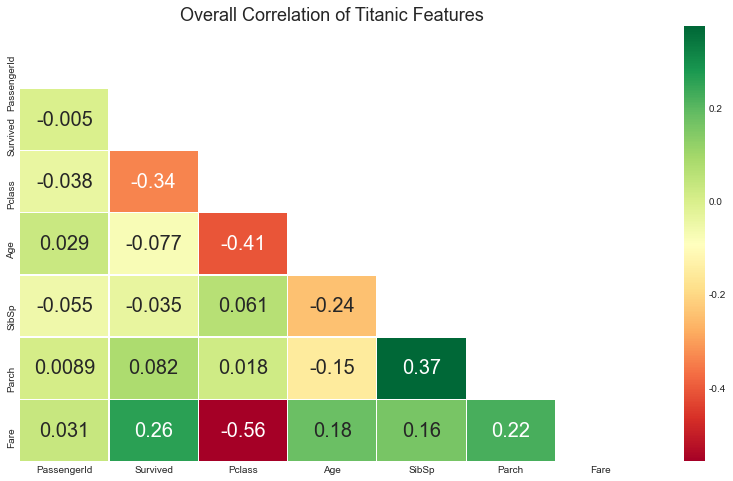

In [14]:
# Co-relation 매트릭스
corr = data.corr()
# 마스크 셋업
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# 그래프 셋업
plt.figure(figsize=(14, 8))
# 그래프 타이틀
plt.title('Overall Correlation of Titanic Features', fontsize=18)
# Co-relation 매트릴스 런칭
sns.heatmap(corr, mask=mask, annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20});

## 4_1. Survived 분석  
Survived-key: {0:Not Survived, 1:Survived }  
Survived는 숫자로 값을 주지만 Categorical Variable인 셈입니다.  
죽던지 살던지 둘 중 하나의 값을 줍니다.  
countplot을 그려봅니다.  
생존 여부 0과 1의 숫자를 세어 본 후 그림을 그리도록 명령을 하는 것입니다.  
plt의 figure라는 메소드를 써서 그림판의 크기를 정하고, seaborn의 카운트 플롯을 그리라는 것입니다.

0    549
1    342
Name: Survived, dtype: int64


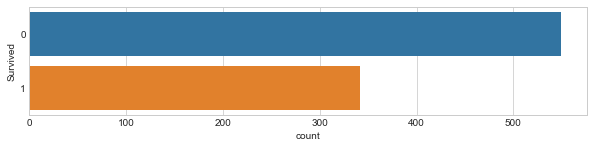

In [15]:
fig = plt.figure(figsize=(10, 2))
sns.countplot(y='Survived', data=train)
print(train.Survived.value_counts())

- 불행히도 사망자가 훨씬 많아 보입니다.
- 전체 사망자 비율을 좀 보겠습니다.


- 파이 그래프와 카운트 플롯을 서브플롯으로 그립니다.


- 행은 하나, 열은 2개의 서브 플롯입니다. 
- 'Survived'의 값을 카운트해서 파이플롯을 만듭니다.
- explode는 폭발하는 것이니깐 1이면 튀어 나가는 것인데 0을 주면 분리만 되고 돌출은 되지 않흡니다. 이어서 0, 1인 것은 첫번째 것은 아니고 두번째 것은 분리된다는 의미로 생각하시면 됩니다.
- autopercent는 1.1이 표현하는 부분은 소수점 한 자리까지 보여주라는 의미입니다.
- ax[0]은 첫번째 칸입니다.

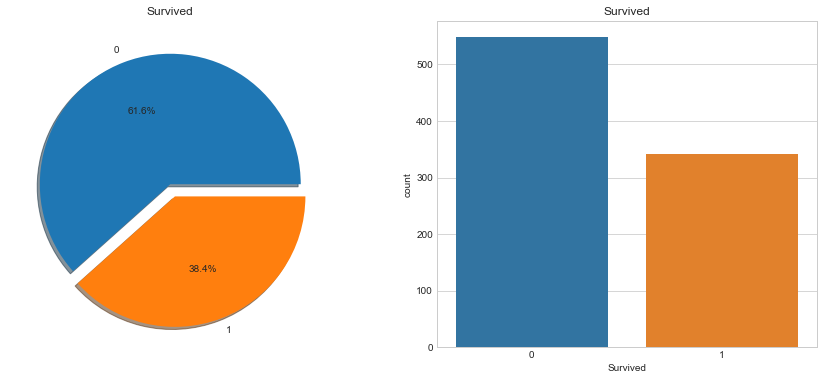

In [16]:
f, ax = plt.subplots(1, 2, figsize=(15, 6))
train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title('Survived');

- 위의 코드를 함수로 만들겠습니다

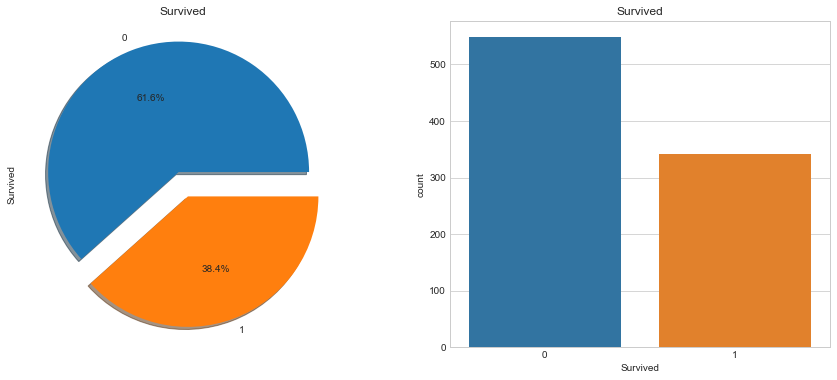

In [17]:
def piecount(col):
    f, ax = plt.subplots(1, 2, figsize=(15, 6))
    train[col].value_counts().plot.pie(explode=[0.1 for i in range(train[col].nunique())], autopct='%1.1f%%', ax=ax[0], shadow=True)
    ax[0].set_title(col)
    ax[0].set_ylabel(col)
    sns.countplot(col, data=train, ax=ax[1])
    ax[1].set_title(col)
    plt.show()
    
piecount('Survived')

## 4_2. Pclass 분석
- Pclass는 값이 숫자이나 서열이 정해진 Oridinal Feature
- Key:1 = 1st, 2 = 2nd, 3 = 3rd
- 각 클래스 당 생존자를 보겠습니다.

In [18]:
train.groupby(['Pclass','Survived'])['Survived'].count( )

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [19]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- 1등급 객실의 사람들은 생존자가 더 많고, 2등급은 생존자에 비해 사망자가 조금 더 많으나, 3등급은 사망자가 3배 이상 많다는 것을 알 수 있습니다.

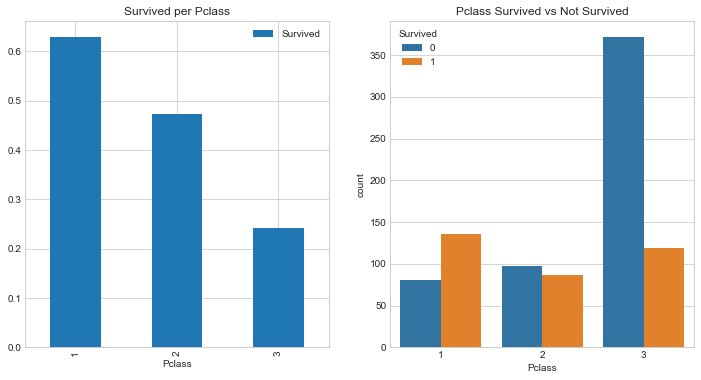

In [20]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived per Pclass')
sns.countplot('Pclass', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Pclass Survived vs Not Survived');

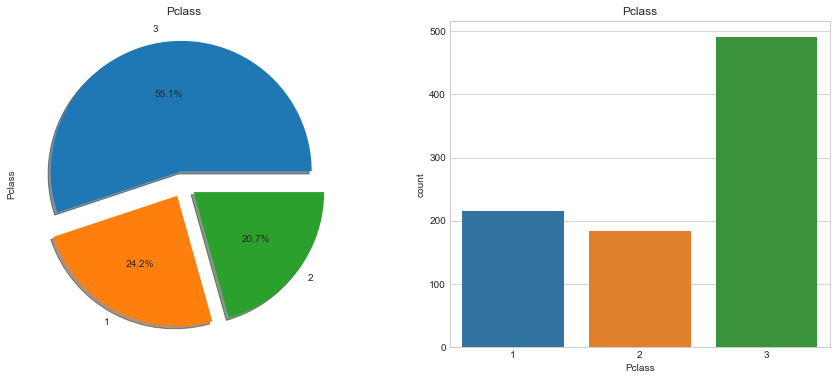

In [21]:
piecount('Pclass')

- 비율로는 3등갘이 반이 넘으나 생존자 측면에서는 1등석이 가장 많다는 것을 알 수 있습니다.

## 4_3. Name 분석
- 이름은 거의 모두 다를 가능성이 큽니다. Family Name, First Name, Middle Name and even Dr.Capt 등등
- 분류를 한번 해봅시다.
- 리스트로 나열 해보겠습니다.

In [22]:
len(data.Name.value_counts())

1307

- 1307개의 이름이 존재합니다.
- ['initial']이란 열을 새로 만들어서 여기에 Name에서 추출한 Regular Expression을 넣습니다.
- 아래에서 str.extract('([A-Za-z]+0.')부분은 str에서 대문자 A\~Z, 소문자 a\~z중에 .명령을 통해. 으로 끝나는 부분을 추출해 내는 것입니다.


In [27]:
temp = data.copy( )
temp['Initial'] = 0
temp['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [28]:
temp['Initial'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Ms            2
Major         2
Lady          1
Don           1
Countess      1
Mme           1
Dona          1
Jonkheer      1
Capt          1
Sir           1
Name: Initial, dtype: int64

Mr나 Miss 등은 많으나 익숙하지 않은 성들도 보입니다.

In [31]:
pd.crosstab(temp.Initial, temp.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


- 생존률로 봅시다.
- 생존률 함수를 만들어 보겠습니다.

In [32]:
def survpct(col):
    return temp.groupby(col)['Survived'].mean()

survpct('Initial')

Initial
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dona             NaN
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

- 생존 숫자로 봅시다.
- test에 있는 Dona의 나이를 보고 어디에 넣을지 보겠습니다.
- Mrs.는 현대처럼 Miss+Mrs를 합친 말이 아니라 당시에는 귀족 미망인을 의미하는 것이었습니다.
- Mlle나 Mme 등도 마드모아젤과 마담의 줄임말인 경우일 것입니다. 귀족 여성들로 보아야 겠죠

In [33]:
temp['LastName'] = data.Name.str.extract('([A-Za-z]+)')

In [38]:
pd.crosstab(temp.LastName, temp.Survived).T.style.background_gradient(cmap='summer_r')

LastName,Abbing,Abbott,Abelson,Adahl,Adams,Ahlin,Aks,Albimona,Alexander,Alhomaki,Ali,Allen,Allison,Allum,Andersen,Anderson,Andersson,Andreasson,Andrew,Andrews,Angle,Appleton,Arnold,Artagaveytia,Asim,Asplund,Astor,Attalah,Aubart,Augustsson,Ayoub,Backstrom,Baclini,Badt,Bailey,Balkic,Ball,Banfield,Barah,Barbara,Barber,Barkworth,Barton,Bateman,Baumann,Baxter,Bazzani,Beane,Beavan,Becker,Beckwith,Beesley,Behr,Bengtsson,Berglund,Berriman,Betros,Bidois,Bing,Birkeland,Bishop,Bissette,Bjornstrom,Blackwell,Blank,Bonnell,Bostandyeff,Boulos,Bourke,Bowen,Bowerman,Bracken,Bradley,Braund,Brewe,Brocklebank,Brown,Bryhl,Burke,Burns,Buss,Butler,Butt,Byles,Bystrom,Cacic,Cairns,Calderhead,Caldwell,Calic,Cameron,Campbell,Canavan,Cann,Caram,Carbines,Cardeza,Carlsson,Carr,Carrau,Carter,Cavendish,Celotti,Chaffee,Chambers,Chapman,Charters,Cherry,Chibnall,Chip,Christmann,Christy,Chronopoulos,Clarke,Cleaver,Clifford,Coelho,Cohen,Coleff,Coleridge,Collander,Colley,Collyer,Compton,Connaghton,Connolly,Connors,Cook,Cor,Corn,Coutts,Coxon,Crease,Cribb,Crosby,Culumovic,Cumings,Cunningham,Dahl,Dahlberg,Dakic,Daly,Danbom,Daniel,Danoff,Dantcheff,Davidson,Davies,Davis,Davison,Dean,Denkoff,Dennis,Devaney,Dick,Dimic,Dodge,Doharr,Doling,Dooley,Dorking,Douglas,Dowdell,Downton,Drazenoic,Drew,Duane,Duff,Duran,Edvardsson,Eitemiller,Eklund,Ekstrom,Elias,Elsbury,Emanuel,Emir,Endres,Eustis,Fahlstrom,Farrell,Farthing,Faunthorpe,Fischer,Fleming,Flynn,Foo,Ford,Foreman,Fortune,Fox,Francatelli,Frauenthal,Frolicher,Frost,Fry,Funk,Futrelle,Fynney,Gale,Gallagher,Garfirth,Garside,Gaskell,Gavey,Gee,Gheorgheff,Giglio,Giles,Gilinski,Gill,Gillespie,Gilnagh,Givard,Glynn,Goldenberg,Goldschmidt,Goldsmith,Goncalves,Goodwin,Graham,Green,Greenberg,Greenfield,Gronnestad,Guggenheim,Gustafsson,Haas,Hagland,Hakkarainen,Hale,Hamalainen,Hampe,Hanna,Hansen,Harder,Harknett,Harmer,Harper,Harrington,Harris,Harrison,Hart,Hassab,Hassan,Hawksford,Hays,Healy,Hedman,Hegarty,Heikkinen,Heininen,Hendekovic,Henry,Herman,Hewlett,Hickman,Hippach,Hirvonen,Hocking,Hodges,Hogeboom,Hold,Holm,Holverson,Homer,Honkanen,Hood,Horgan,Hosono,Hoyt,Humblen,Hunt,Ibrahim,Icard,Ilett,Ilmakangas,Isham,Ivanoff,Jacobsohn,Jalsevac,Jansson,Jardin,Jarvis,Jenkin,Jensen,Jermyn,Jerwan,Johannesen,Johanson,Johansson,Johnson,Johnston,Jonkoff,Jonsson,Jussila,Kallio,Kalvik,Kantor,Karaic,Karlsson,Karun,Kassem,Keane,Keefe,Kelly,Kent,Kenyon,Kiernan,Kilgannon,Kimball,Kink,Kirkland,Klaber,Klasen,Knight,Kraeff,Kvillner,Lahoud,Lahtinen,Laitinen,Laleff,Lam,Landergren,Lang,Laroche,Larsson,LeRoy,Leader,Leeni,Lefebre,Lehmann,Leinonen,Leitch,Lemberopolous,Lemore,Lennon,Leonard,Lester,Lesurer,Levy,Lewy,Leyson,Lievens,Lindahl,Lindblom,Lindell,Lindqvist,Lines,Ling,Lobb,Long,Longley,Louch,Lovell,Lulic,Lundahl,Lurette,Mack,Madigan,Madill,Madsen,Maenpaa,Maioni,Maisner,Mallet,Mamee,Mangan,Mannion,Marechal,Markoff,Markun,Marvin,Masselmani,Matthews,Mayne,McCarthy,McCormack,McCoy,McDermott,McEvoy,McGough,McGovern,McGowan,McKane,McMahon,McNamee,Meanwell,Meek,Mellinger,Mellors,Meo,Mernagh,Meyer,Millet,Milling,Minahan,Mineff,Mionoff,Mitchell,Mitkoff,Mockler,Moen,Molson,Montvila,Moor,Moore,Moran,Moraweck,Morley,Morrow,Moss,Moubarek,Moussa,Moutal,Mudd,Mullens,Murdlin,Murphy,Myhrman,Naidenoff,Najib,Nakid,Nankoff,Nasser,Natsch,Navratil,Nenkoff,Newell,Newsom,Nicholls,Nicholson,Nicola,Nilsson,Nirva,Niskanen,Norman,Nosworthy,Novel,Nye,Nysten,Nysveen,O,Odahl,Ohman,Olsen,Olsson,Olsvigen,Oreskovic,Osen,Osman,Ostby,Otter,Padro,Pain,Palsson,Panula,Parkes,Parr,Parrish,Partner,Pasic,Patchett,Paulner,Pavlovic,Pears,Peduzzi,Pekoniemi,Penasco,Pengelly,Perkin,Pernot,Perreault,Persson,Peter,Peters,Petranec,Petroff,Petterson,Pettersson,Peuchen,Phillips,Pickard,Pinsky,Plotcharsky,Ponesell,Porter,Potter,Quick,Radeff,Razi,Reed,Reeves,Rekic,Renouf,Reuchlin,Reynaldo,Rice,Richard,Richards,Ridsdale,Ringhini,Rintamaki,Risien,Robbins,Robert,Robins,Roebling,Rogers,Romaine,Rommetvedt,Rood,Rosblom,Ross,Rothes,Rothschild,Rouse,Rugg,Rush,Ryan,Ryerson,Saad,Saalfeld,Sadlier,Sage,Sagesser,Salkjelsvik,Salon

- 이제 우리는 Initial에서 Mr.등의 포칭을 뽑아내었고, 성을 뽑아내었습니다.
- 머신이 알파벳보다 숫자를 좋아하므로 숫자로 바꿉니다.
- 아, 그러기 전에 Donna를 처리해야죠.

In [40]:
temp.loc[temp['Initial'] == 'Dona']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,Dona,Oliva


- 나이로 추측해서 Mrs.로 넣습니다.
- 결측치를 처리하는 방법은 많으나 이렇게 하나일 경우에는 가장 적절한 추측을 사용하여 넣는 것도 괜찮습니다.

In [41]:
temp.loc[temp['Initial']=='Dona','Initial'] = 'Mrs'

In [42]:
pd.crosstab(temp.Initial, temp.Survived).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0
1.0,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1


In [44]:
temp['NumName'] = temp['LastName'].factorize()[0]
temp['NumName'].tail(10)

408    847
409    744
410    848
411    211
412    849
413    850
414    851
415    852
416    799
417    116
Name: NumName, dtype: int64

In [45]:
temp.loc[temp['LastName']=='Ali']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName
210,211,0.0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.05,NaN,S,Mr,Ali,182
784,785,0.0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.05,NaN,S,Mr,Ali,182


- 보시다시피 같은 Last name에 같은 번호가 쓰여졌다.
- 끝에 [0]은 레이블만 보고 번호를 붙이는 것으로 정말 unique한 것이란 것은 안 본다는 것입니다.
    - factorize를 사용하여 배열의 튜플( array([0, 1, 2, ...]), index(['Ali, Capt, ...], dtype='object'))을 반환하므로 [0]을 선택해주는 것입니다.
- 자 이제 이름을 의미하는 중요한 요소 두 개를 숫자로 바꾸었으니 다음으로 갑시다.

## 4_4. Sex 분석
- 함수를 만들어서 train 파일을 보지요

In [46]:
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


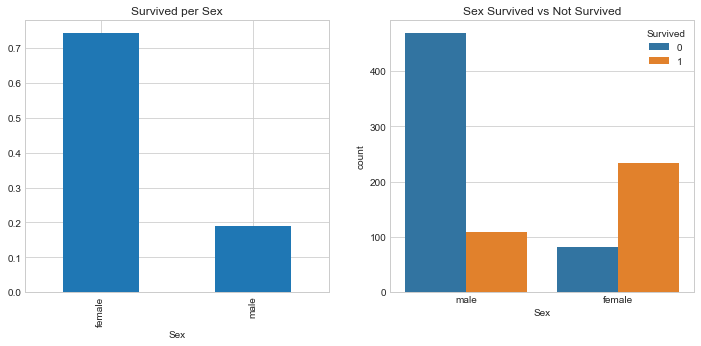

In [47]:
def bag(col, target, title, title1):
    f, ax = plt.subplots(1, 2, figsize=(12, 5))
    train.groupby([col])[target].mean().plot(kind='bar', ax=ax[0])
    ax[0].set_title(title)
    sns.countplot(col, hue=target, data=train, ax=ax[1])
    ax[1].set_title(title1)
    plt.show()
    
bag('Sex','Survived','Survived per Sex','Sex Survived vs Not Survived')

- 배에 있던 남자의 수는 여자의 수보다 훨씬 많습니다. 여전히 생존 여성 수는 남성 수의 거의 두배입니다. 선박 여성의 생존률은 약 75%인 반면 남성의 생존율은 약 18~19%입니다.
- 이것은 남성/여성을 1, 2로 나누면 죌 것 같은 뻔해 보이는 것이지만 좀 더 세분화하면 좋아보입니다.
- 예를 들어 아기들은 아기인지 남자인지 여자인지 구명보트를 태울 때 안 물어볼 것 이기 때문입니다.
- 오히려 (불행하게도) 귀족 아기인지 서민의 아기인지는 삶과 불생을 가를 수 있습니다.
- 생존 Pclass별로 성병을 봅니다.

In [49]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True).style.background_gradient(cmap='summer_r')

## 4_5. Age 분석
- Age는 Continuous한 값입니다.
- 빈칸이 많아서 빈칸처리가 결정적인 역할을 할 것 같습니다.
- Age의 최대, 최소, 중간을 보겠습니다.

In [50]:
print('Oldest Passenger was', data['Age'].max(), 'Years')
print('Youngest Passenger was', data['Age'].min(), 'Years')
print('Average Age on the ship was', int(data['Age'].mean()), 'Years')

Oldest Passenger was 80.0 Years
Youngest Passenger was 0.17 Years
Average Age on the ship was 29 Years


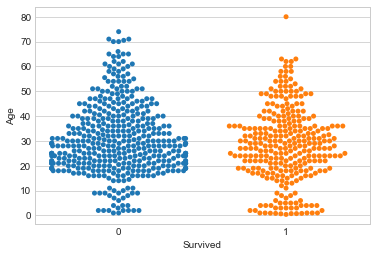

In [52]:
sns.swarmplot(x=train['Survived'], y=train['Age'])
plt.xlabel('Survived')
plt.ylabel('Age');

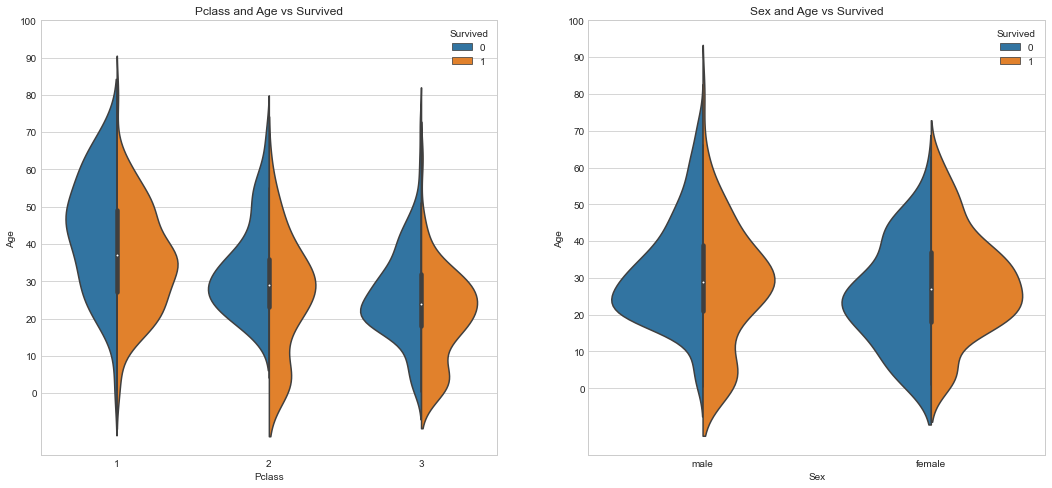

In [53]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass','Age', hue='Survived', data=train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()